In [1]:
import oceanspy as ospy
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cmocean.cm as cmo

# Kögur section

In [2]:
mooring_kogur = xr.open_dataset(r'D:\MScData\mooring_kogur.nc')

In [3]:
od_mooring_kogur = ospy.OceanDataset(mooring_kogur)
od_mooring_kogur = od_mooring_kogur.subsample.cutout(timeFreq='ME',sampMethod='mean')

Cutting out the oceandataset.


c:\Users\eirik\anaconda3\envs\MSc_Env1\Lib\site-packages\oceanspy\subsample.py:1561: UserWarning: 
Time resampling drops variables on `time_midp` dimension.
Dropped variables: ['time_midp'].
  return cutout(self._od, **kwargs)


In [4]:
display(od_mooring_kogur.dataset)

<xarray.Dataset>
Dimensions:            (time: 12, Z: 216, mooring: 199, Y: 1, Xp1: 2, Yp1: 2,
                        X: 1, Zp1: 217, Zu: 216, Zl: 216, mooring_midp: 198,
                        time_midp: 11)
Coordinates: (12/29)
  * time               (time) datetime64[ns] 2017-09-30 ... 2018-08-31
  * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
  * mooring            (mooring) int64 0 1 2 3 4 5 6 ... 193 194 195 196 197 198
  * Y                  (Y) int64 0
  * Xp1                (Xp1) int64 0 1
  * Yp1                (Yp1) int64 0 1
    ...                 ...
    Xind               (mooring, Y, X) float64 ...
    Yind               (mooring, Y, X) float64 ...
    mooring_dist       (mooring) float64 ...
  * mooring_midp       (mooring_midp) float64 0.5 1.5 2.5 ... 195.5 196.5 197.5
    mooring_midp_dist  (mooring_midp) float64 ...
  * time_midp          (time_midp) datetime64[ns] 2017-10-15T12:00:00 ... 201...
Data variables:
    U                  (time, Z, mooring, Y, Xp1) float64 -0.1482 ... nan
    V                  (time, Z, mooring, Yp1, X) float64 -0.08387 ... nan
    Temp               (time, Z, mooring, Y, X) float64 2.176 2.138 ... nan nan
    S                  (time, Z, mooring, Y, X) float64 31.06 31.11 ... nan nan
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

# Integration method down to specific salinity depth

In [5]:
display(od_mooring_kogur['S'])

<xarray.DataArray 'S' (time: 12, Z: 216, mooring: 199, Y: 1, X: 1)>
array([[[[[31.05833056]],

         [[31.11200824]],

         [[31.1693947 ]],

         ...,

         [[34.91669968]],

         [[34.92471048]],

         [[34.92541128]]],


        [[[31.06803316]],

         [[31.12442624]],

         [[31.18427358]],
...
         [[        nan]],

         [[        nan]],

         [[        nan]]],


        [[[        nan]],

         [[        nan]],

         [[        nan]],

         ...,

         [[        nan]],

         [[        nan]],

         [[        nan]]]]])
Coordinates:
  * time          (time) datetime64[ns] 2017-09-30 2017-10-31 ... 2018-08-31
  * Z             (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
  * mooring       (mooring) int64 0 1 2 3 4 5 6 ... 192 193 194 195 196 197 198
  * Y             (Y) int64 0
  * X             (X) int64 0
    drF           (Z) float64 ...
    XC            (mooring, Y, X) float64 ...
    YC            (mooring, Y, X) float64 ...
    Xind          (mooring, Y, X) float64 ...
    Yind          (mooring, Y, X) float64 ...
    mooring_dist  (mooring) float64 ...
Attributes:
    long_name:      salinity
    standard_name:  sea_water_salinity
    units:          g kg-1
    _coordinates:   XC YC RC iter

In [6]:
# Variables in coordinate structure of numerical grid xarray.DataArray 'S' (time: 1460, Z: 216, mooring: 199, Y: 1X: 1)
time = 0
mooring = 0
Y = 0
X = 0
display(od_mooring_kogur['S'][time][:,mooring,Y,X])

<xarray.DataArray 'S' (Z: 216)>
array([31.05833056, 31.06803316, 31.09440349, 31.14942273, 31.23520364,
       31.34010943, 31.45968481, 31.62419759, 31.82966896, 32.07383415,
       32.32481926, 32.58523844, 32.8159951 , 33.01150672, 33.22759254,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
...
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])
Coordinates:
    time          datetime64[ns] 2017-09-30
  * Z             (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
    mooring       int64 0
    Y             int64 0
    X             int64 0
    drF           (Z) float64 ...
    XC            float64 ...
    YC            float64 ...
    Xind          float64 ...
    Yind          float64 ...
    mooring_dist  float64 ...
Attributes:
    long_name:      salinity
    standard_name:  sea_water_salinity
    units:          g kg-1
    _coordinates:   XC YC RC iter

Text(0.5, 1.0, '68.685846855$^oN$  -26.278978765$^oE$')

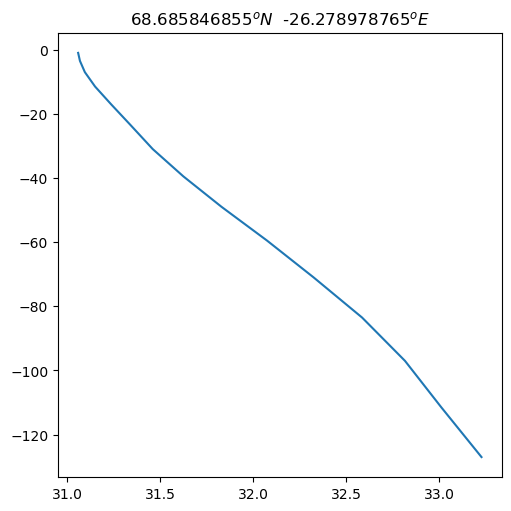

In [7]:
S = od_mooring_kogur['S'][time][:,0,Y,X]
fig, ax = plt.subplots(figsize=(5,5),layout='constrained')
ax.plot(S,S.Z.values)
ax.set_title(str(S.YC.values) + '$^oN$  ' + str(S.XC.values)+'$^oE$')

# Plot vertical section of Kögur

Cutting out the oceandataset.


c:\Users\eirik\anaconda3\envs\MSc_Env1\Lib\site-packages\oceanspy\subsample.py:1561: UserWarning: 
Time resampling drops variables on `time_midp` dimension.
Dropped variables: ['time_midp'].
  return cutout(self._od, **kwargs)
c:\Users\eirik\anaconda3\envs\MSc_Env1\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


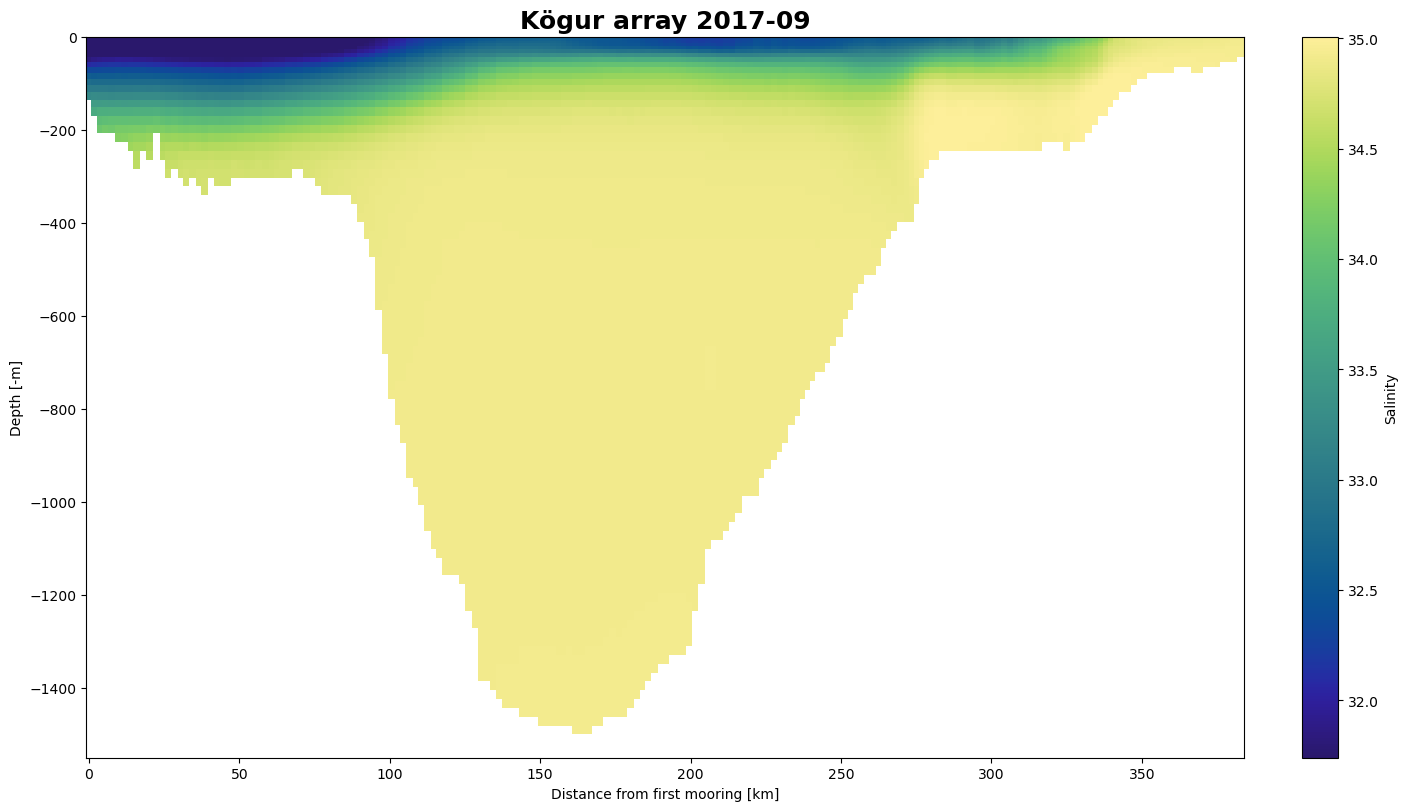

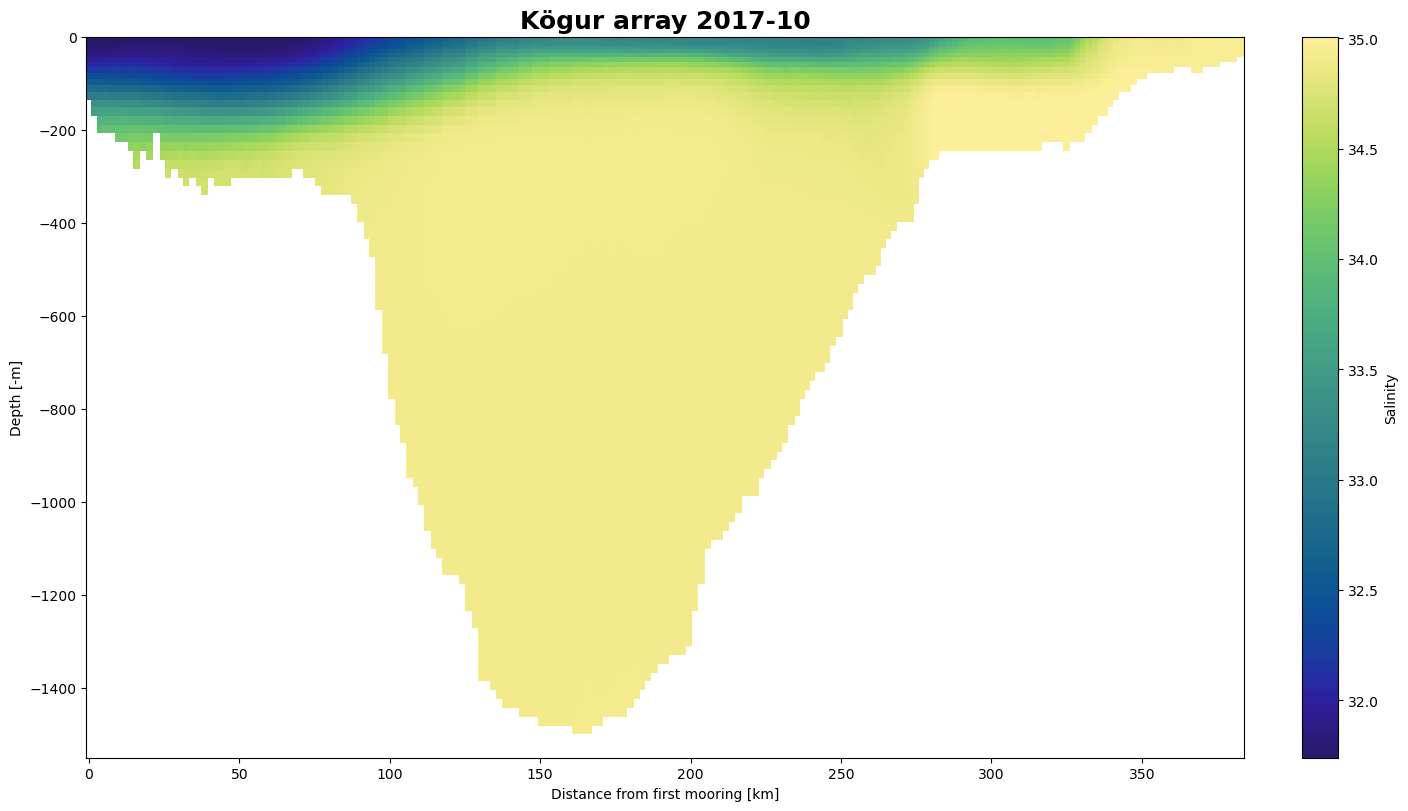

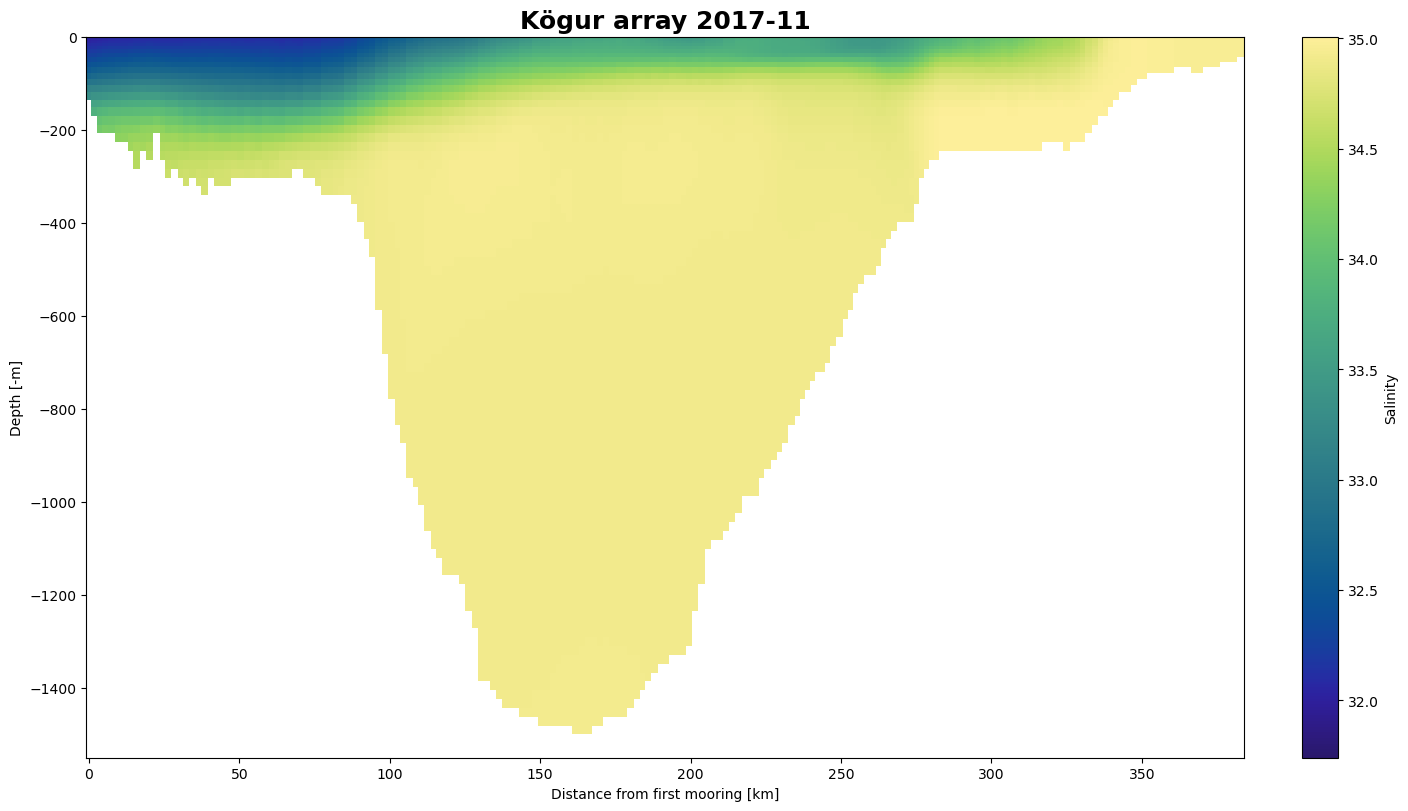

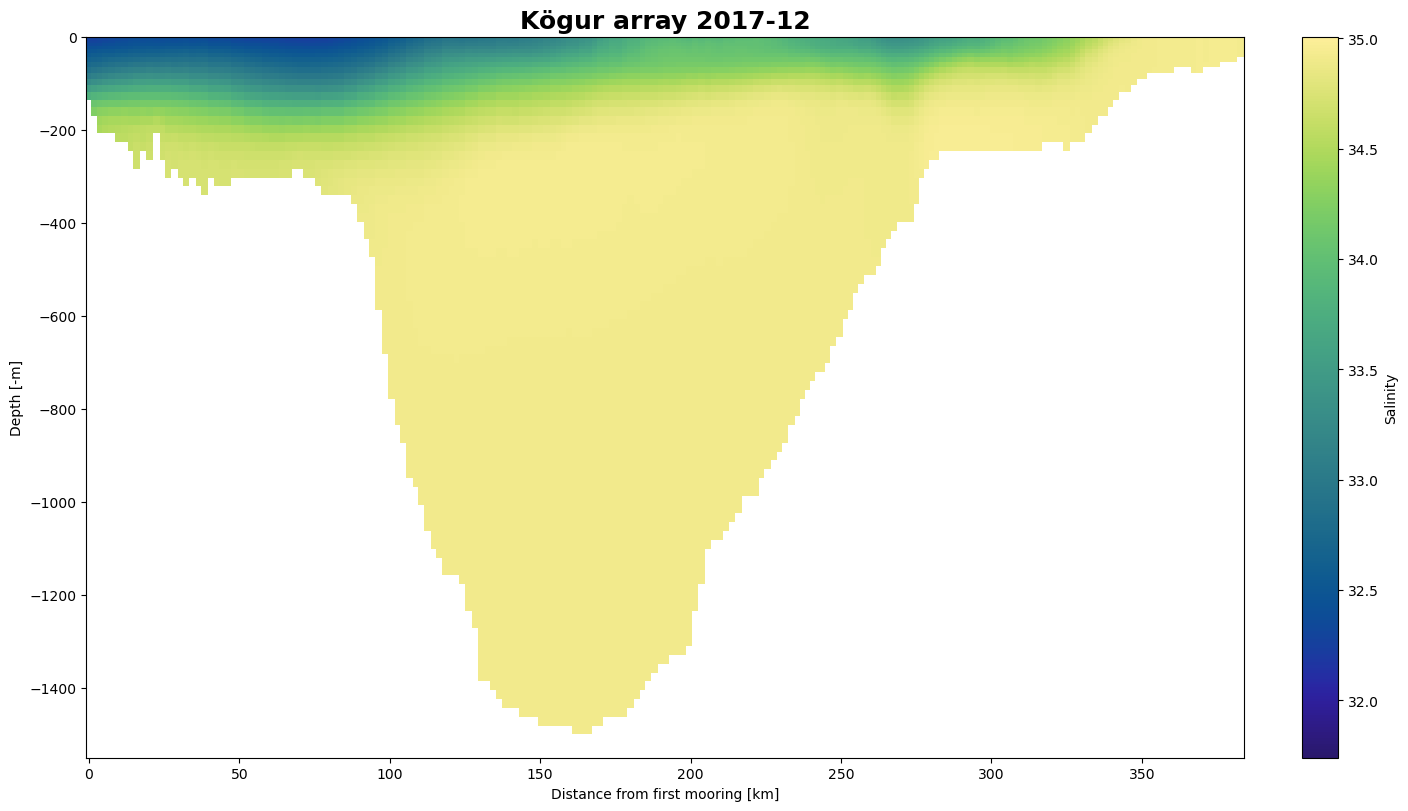

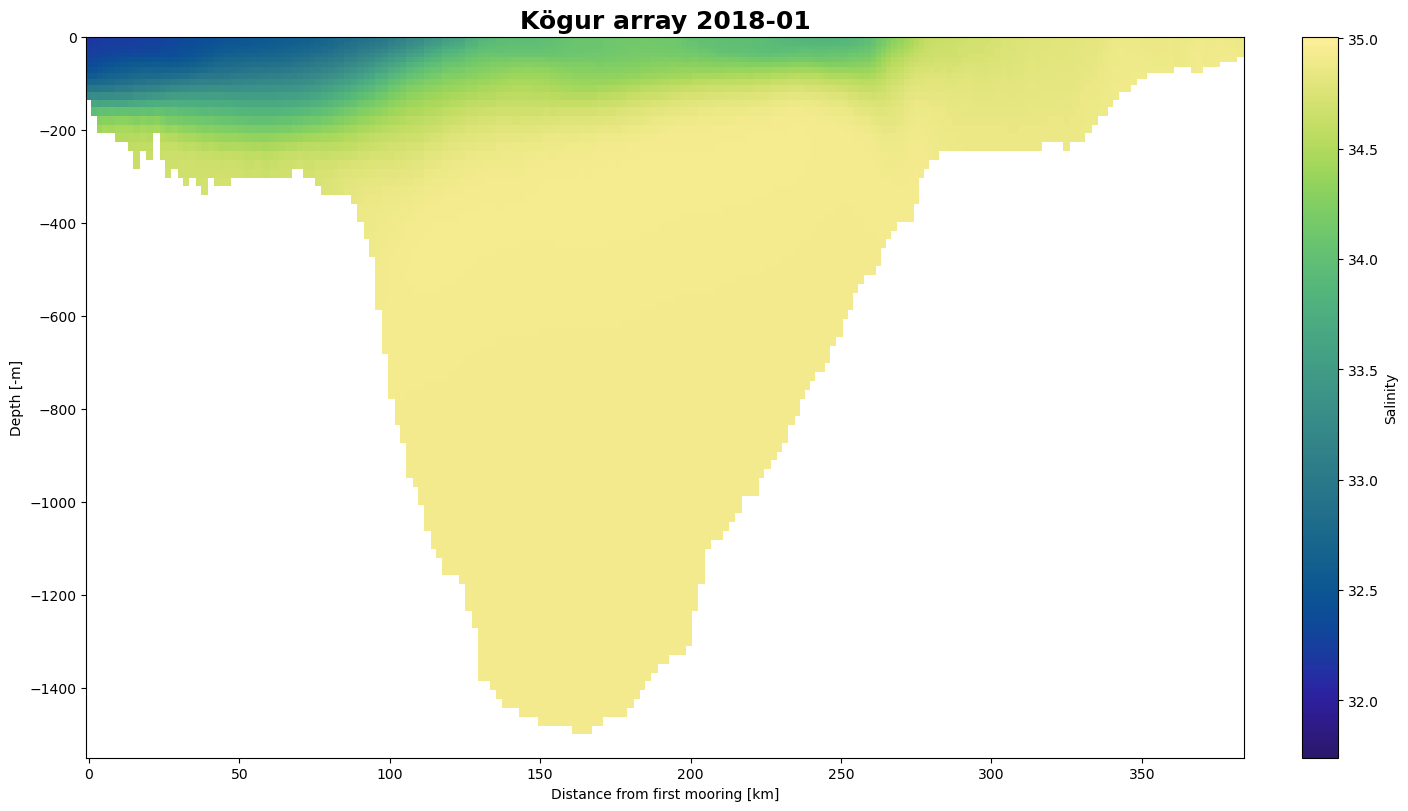

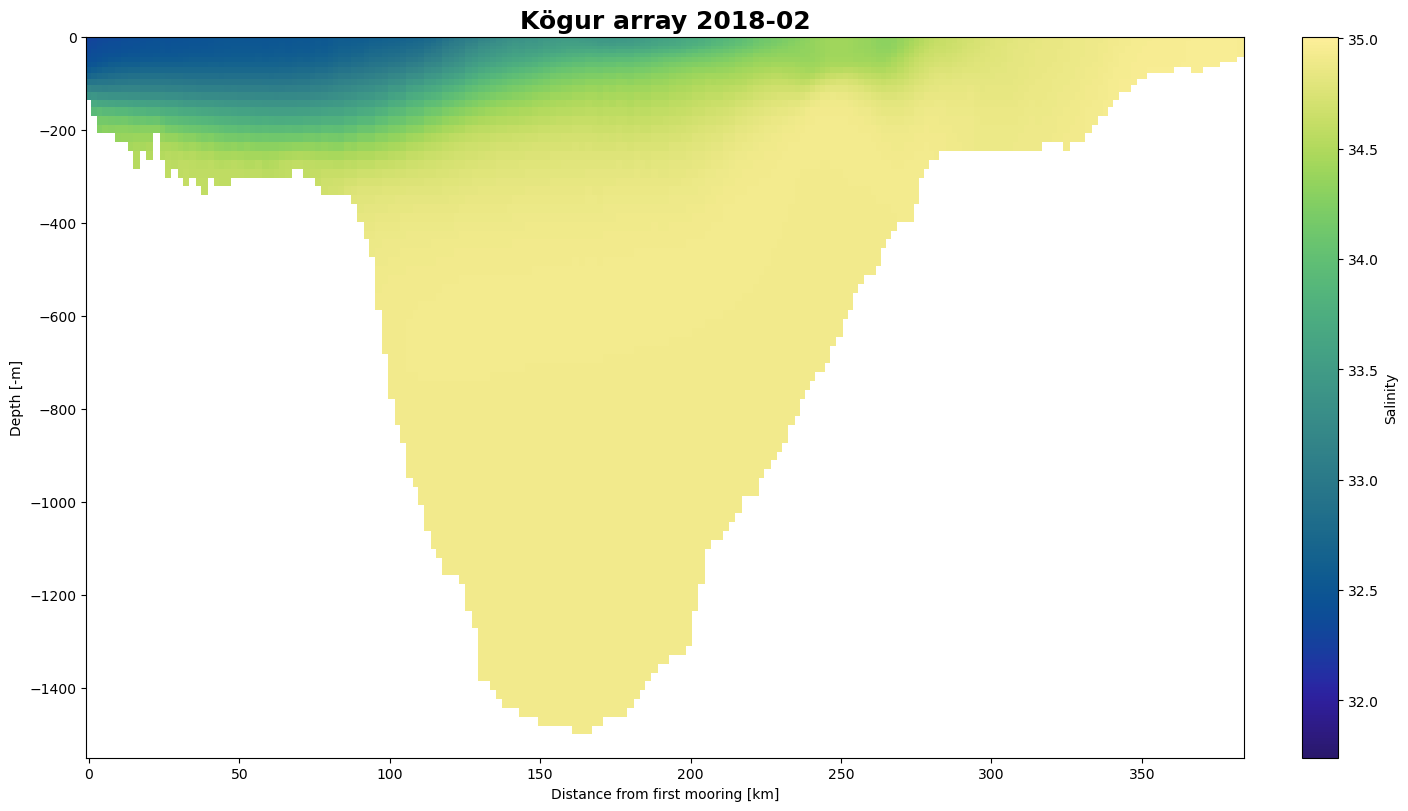

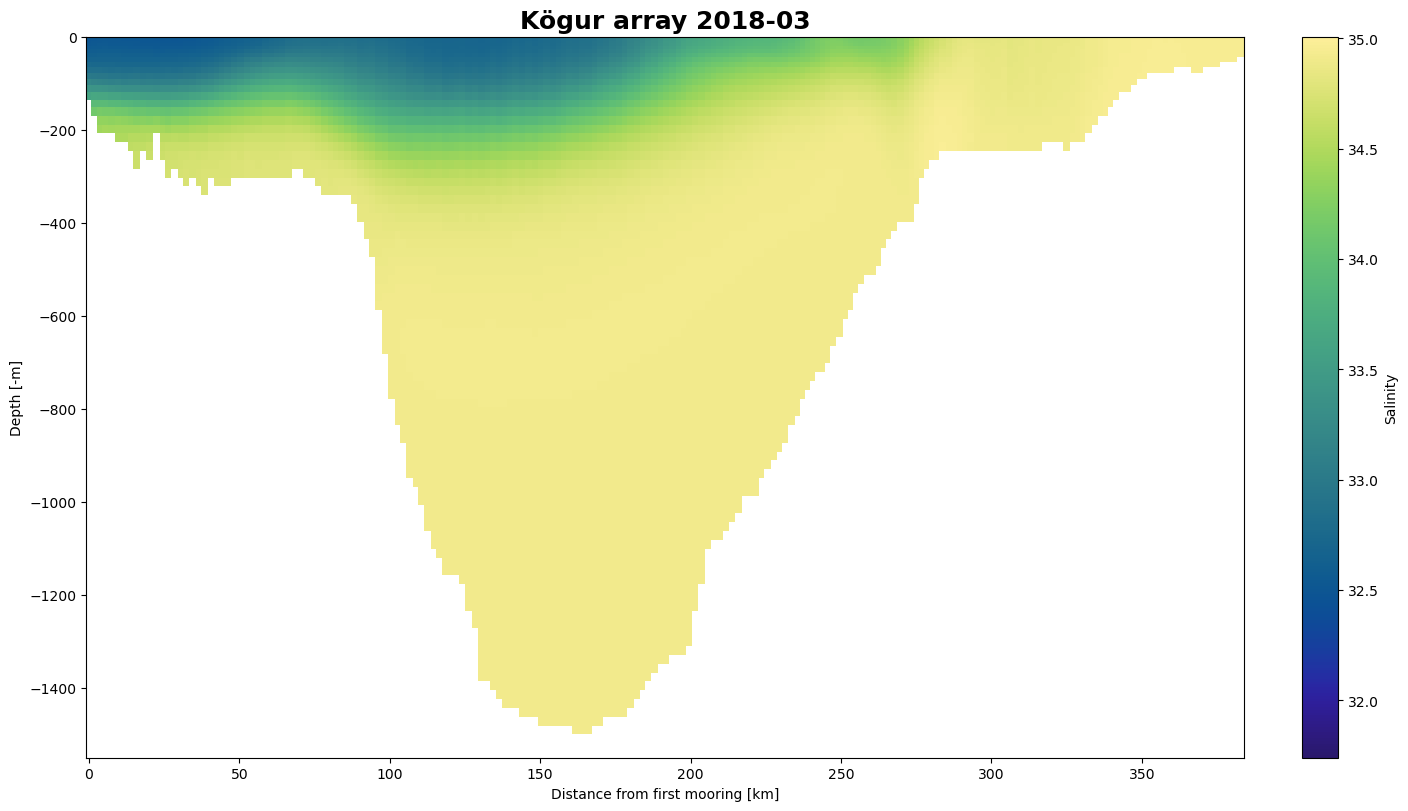

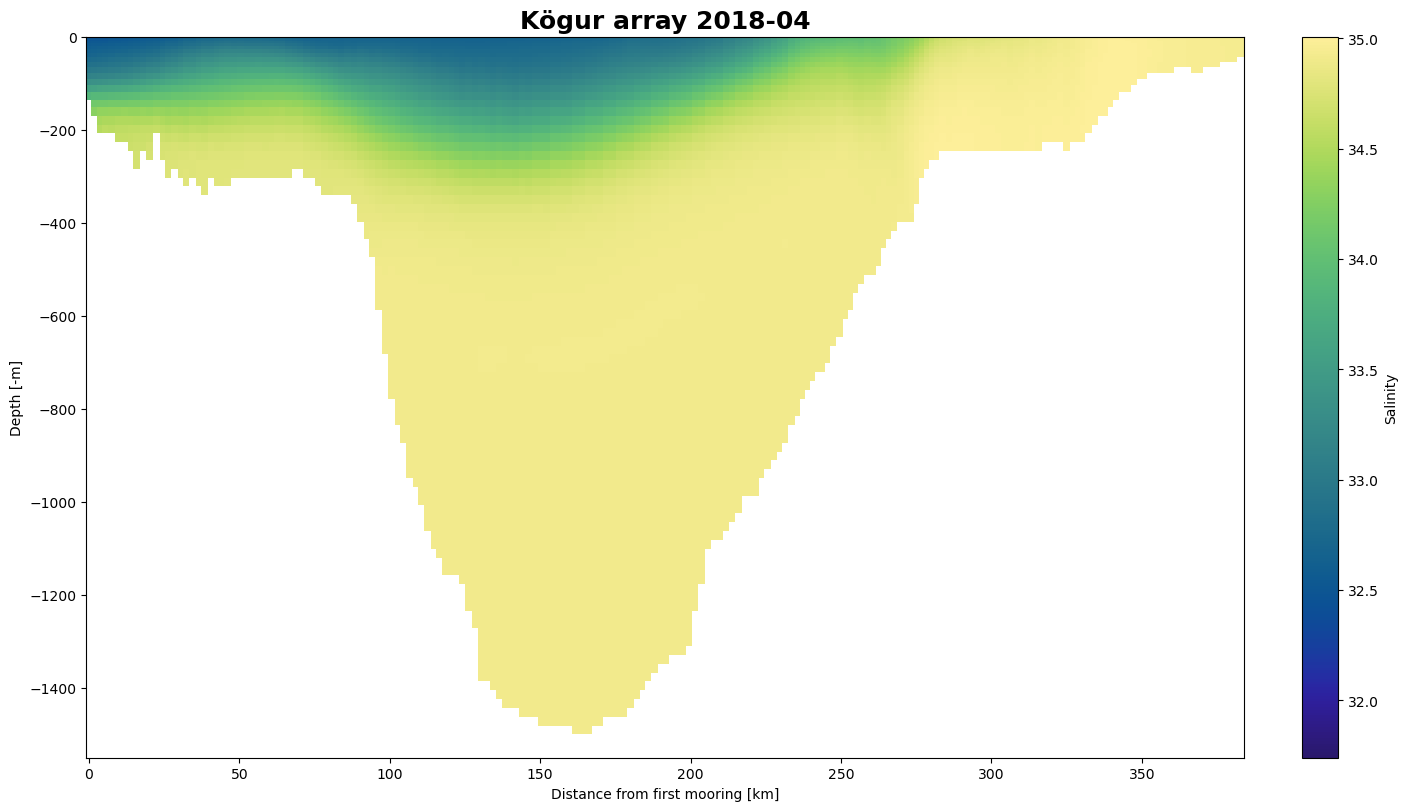

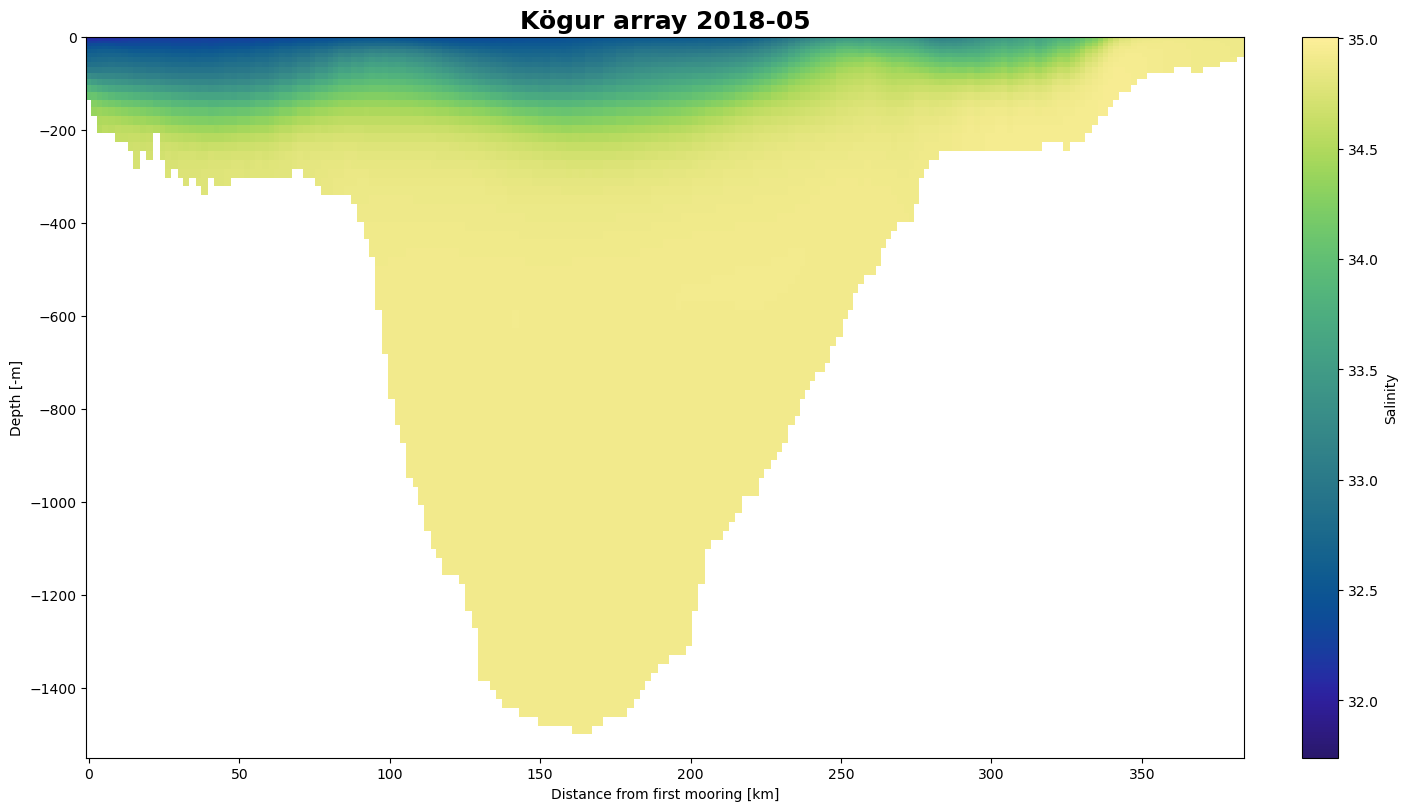

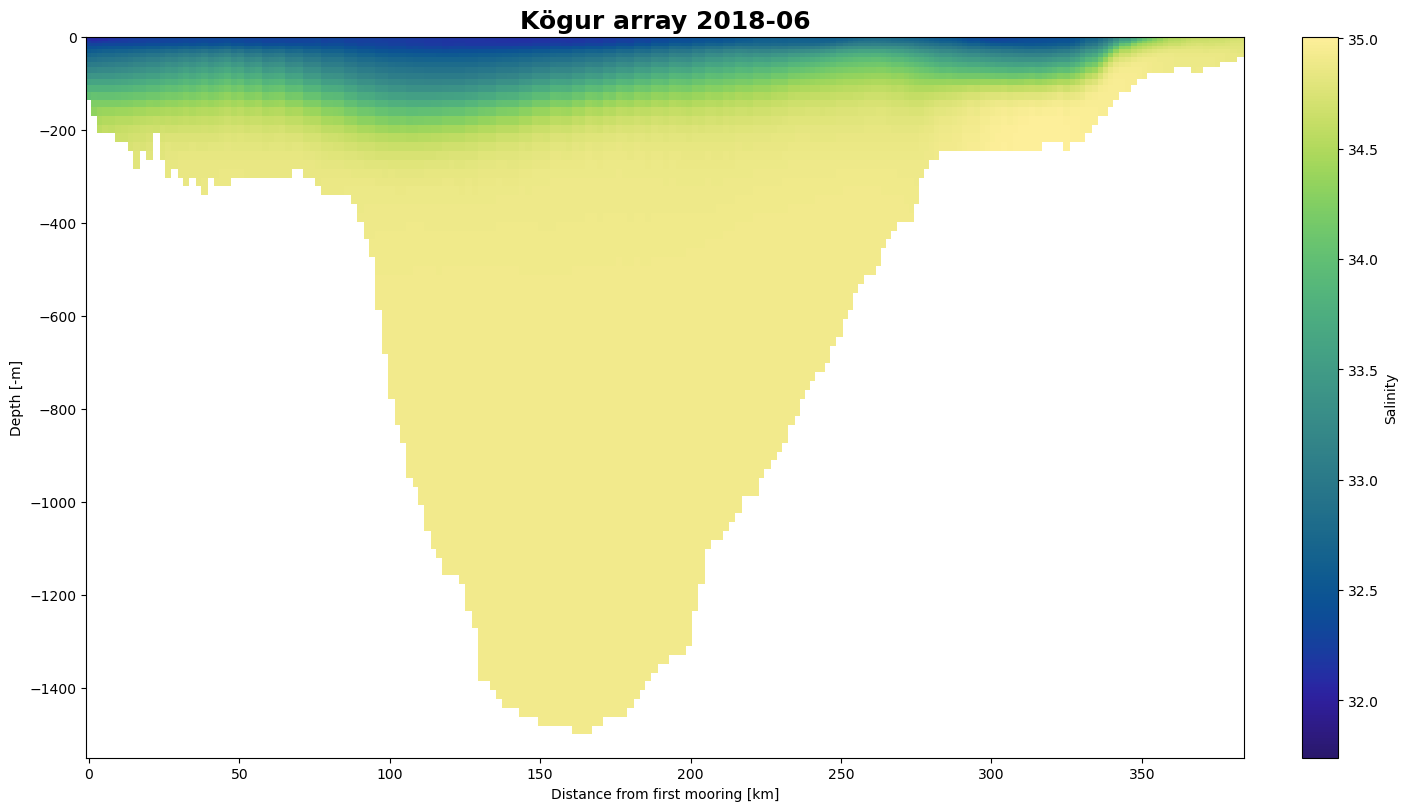

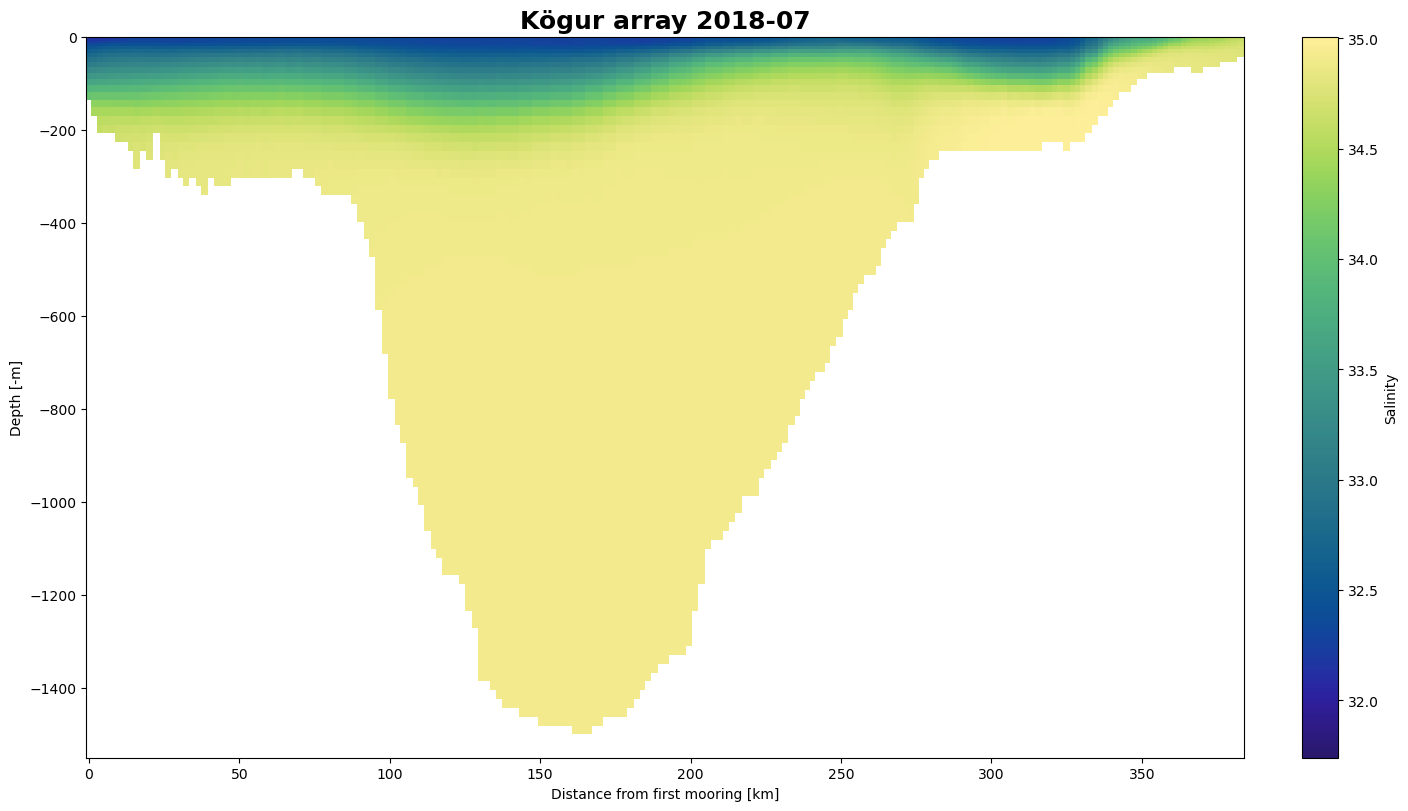

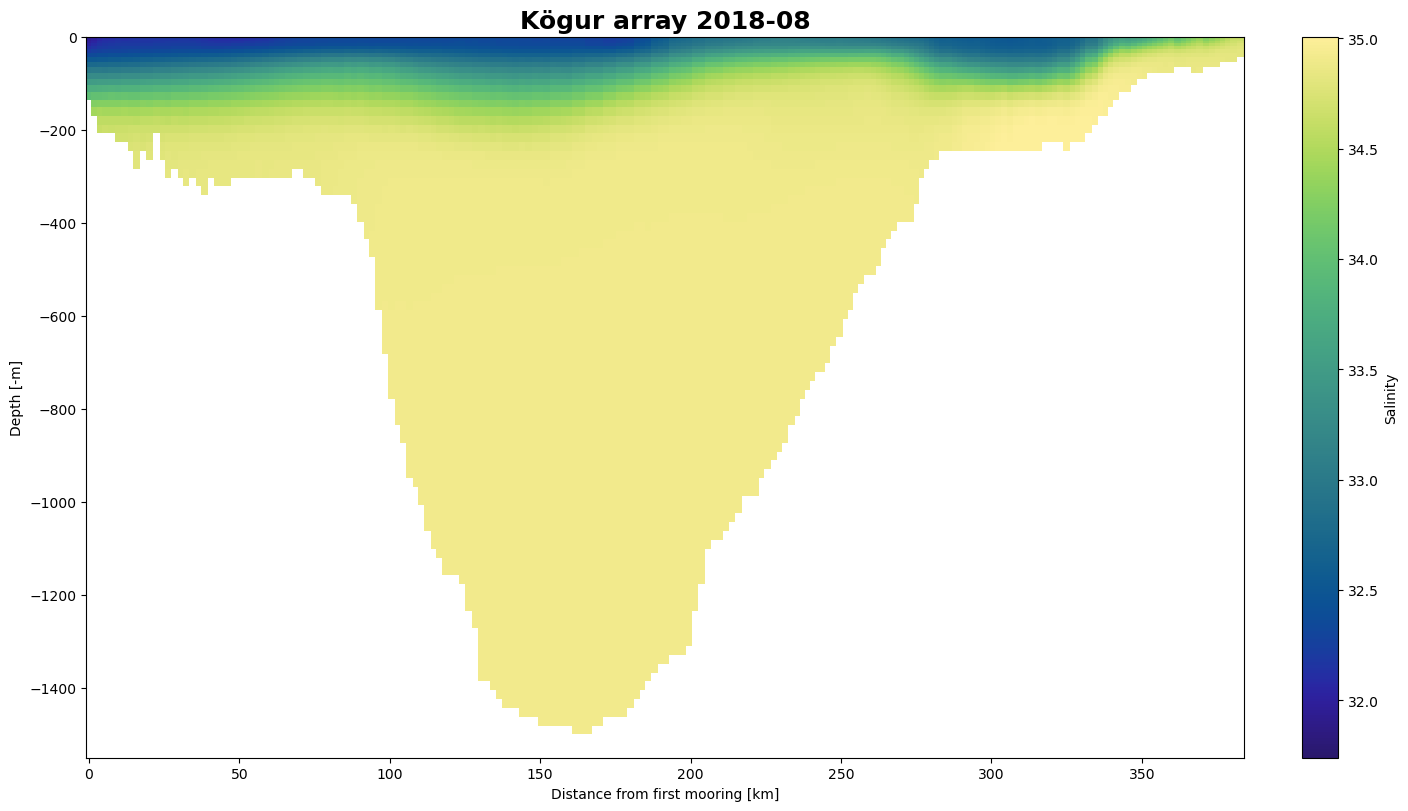

In [8]:
S_mean = od_mooring_kogur.subsample.cutout(timeFreq='Y',sampMethod='mean')['S']
vmin, vmax = S_mean.min(), S_mean.max()
S = od_mooring_kogur['S'][:,:,:,0,0] # time, Z, Mooring, Y, X
for i in range(len(S.time)):
    fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
    mesh = ax.pcolormesh(S[i].mooring_dist,S[i].Z,S[i],cmap=cmo.haline,vmin=vmin,vmax=vmax)
    cbar = fig.colorbar(mesh)
    cbar.set_label('Salinity')

    ax.set_ylabel('Depth [-m]')
    ax.set_xlabel('Distance from first mooring [km]')
    ax.set_ylim(-1550,0)
    ax.set_title(f'Kögur array {str(S[i].time.values)[0:7]}',fontweight='bold',fontsize=18)

    plt.savefig(f'C:/Users/eirik/Master/Figures/Kögur_{str(S[i].time.values)[0:7]}')

# Test with defined FW at 34 salinity
- Masking with .where(S<34,other=np.nan)
- use oceanspy's .compute.mooring_volume_transport()

In [9]:
# S is defined by monthly mean values from above

od_mooring_kogur = od_mooring_kogur.compute.mooring_volume_transport()

Computing horizontal volume transport.


In [10]:
display(od_mooring_kogur.dataset['transport'])

<xarray.DataArray 'transport' (time: 12, Z: 216, mooring: 199, path: 2)>
array([[[[            nan,             nan],
         [-4.17873914e-04, -5.52784054e-04],
         [-3.87202899e-04, -5.53737730e-04],
         ...,
         [ 6.72640717e-05,  7.22732008e-05],
         [ 0.00000000e+00,  1.52806245e-04],
         [            nan,             nan]],

        [[            nan,             nan],
         [-5.61707366e-04, -7.70151401e-04],
         [-5.17251273e-04, -7.56637485e-04],
         ...,
         [ 1.68262907e-04,  1.75987057e-04],
         [ 0.00000000e+00,  3.07454777e-04],
         [            nan,             nan]],

        [[            nan,             nan],
         [-6.62820017e-04, -9.38119213e-04],
         [-6.27399108e-04, -8.89064039e-04],
         ...,
...
         ...,
         [ 0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00],
         [            nan,             nan]],

        [[            nan,             nan],
         [ 0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00],
         [            nan,             nan]],

        [[            nan,             nan],
         [ 0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00],
         [            nan,             nan]]]])
Coordinates:
  * time          (time) datetime64[ns] 2017-09-30 2017-10-31 ... 2018-08-31
  * Z             (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
  * mooring       (mooring) int64 0 1 2 3 4 5 6 ... 192 193 194 195 196 197 198
    drF           (Z) float64 ...
    mooring_dist  (mooring) float64 0.0 1.686 3.371 5.055 ... 378.5 380.2 382.8
Dimensions without coordinates: path
Attributes:
    units:      Sv
    long_name:  Horizontal volume transport

In [11]:
tran_moor = od_mooring_kogur.dataset['transport']

ref_salinity = 32.35
salinity = od_mooring_kogur.dataset['S'].squeeze()
FWT_Kogur = tran_moor.where(salinity<ref_salinity)

cum_moor = tran_moor.sum('Z').mean('time').cumsum('mooring')
cum_moor.attrs = tran_moor.attrs
cum_FWT_moor = FWT_Kogur.sum('Z').mean('time').cumsum('mooring')
cum_FWT_moor.attrs = FWT_Kogur.attrs

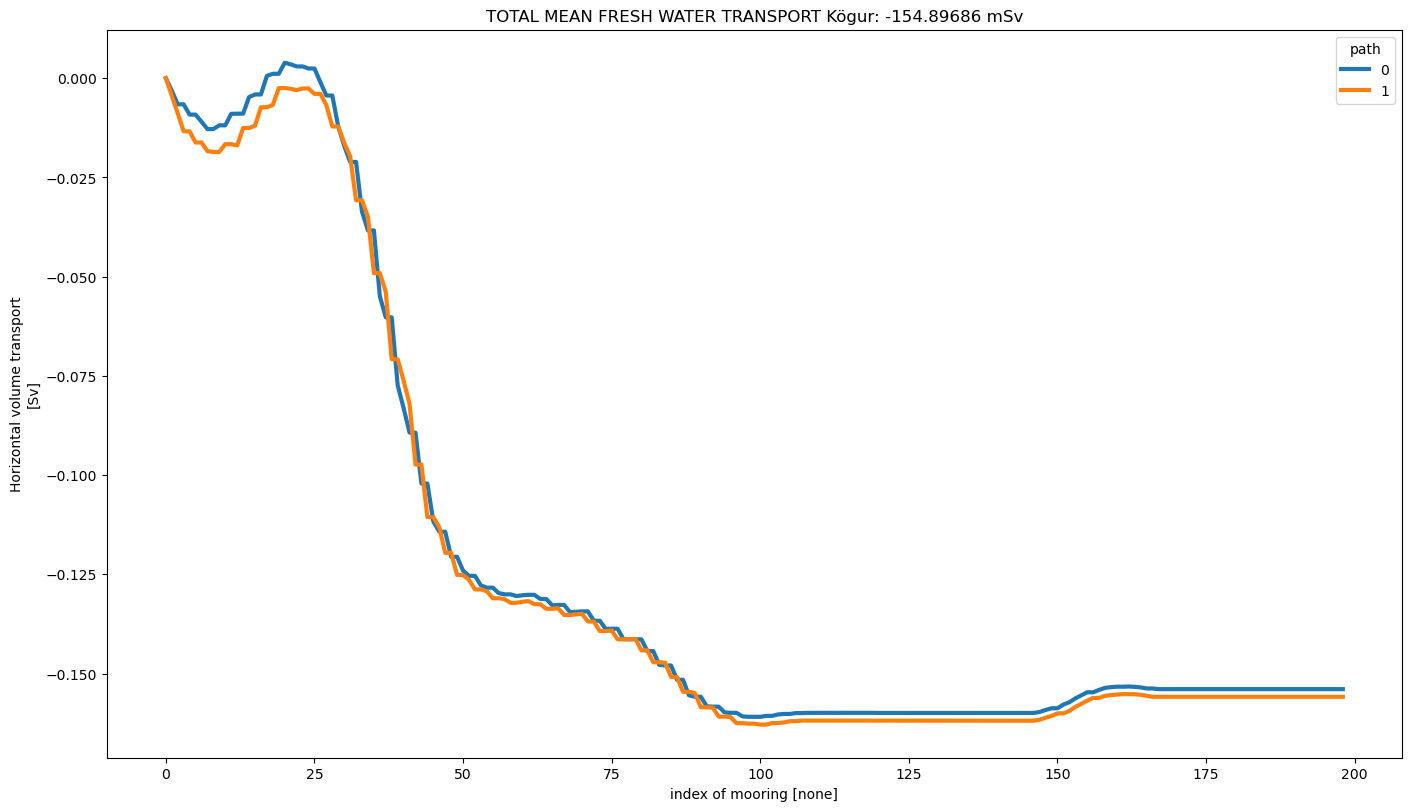

In [12]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
lines = cum_FWT_moor.squeeze().plot.line(hue="path", linewidth=3)
tot_mean_FWT_moor = cum_FWT_moor.isel(mooring=-1).mean('path')
title = ax.set_title(
    "TOTAL MEAN FRESH WATER TRANSPORT Kögur: {0:.5f} mSv" "".format(tot_mean_FWT_moor.values*10**3)
)

# Plot shows evolution of summation of mooring

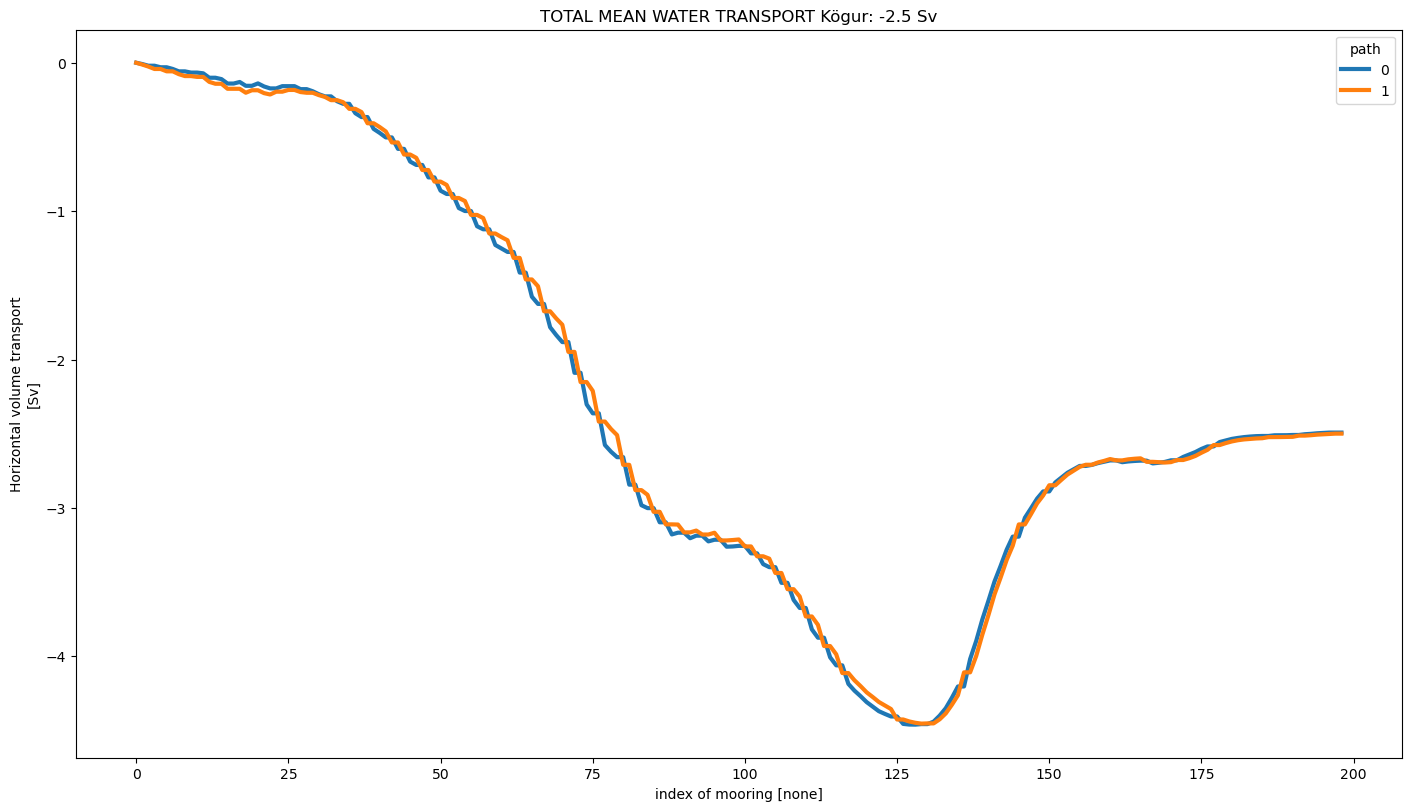

In [13]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
lines = cum_moor.squeeze().plot.line(hue="path", linewidth=3)
tot_mean_moor = cum_moor.isel(mooring=-1).mean('path')
title = ax.set_title(
    "TOTAL MEAN WATER TRANSPORT Kögur: {0:.1f} Sv" "".format(tot_mean_moor.values)
)